<a href="https://colab.research.google.com/github/ghimirebimal/ML-Projects/blob/main/Image_Classification_using_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Cifar10 dataset**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


# **Loading Cifar10 Dataset**

In [ ]:
(X_train,y_train), (X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

# **Rearranging 2-D training sample to 1-D sample for easy handling**

In [ ]:
y_train=y_train.reshape(-1,) #Rearranging 2_D train sample to 1_D train sample
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

# **Defining Categorical Labels for the Cifar10 Dataset**

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
def plot_figure(X,y,index):
  plt.figure(figsize=(10,3))
  plt.imshow(X[index])
  plt.xlabel(labels[y[index]])

# **Plotting first 5 training images**

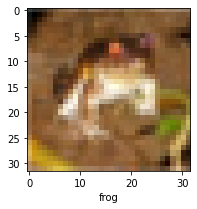

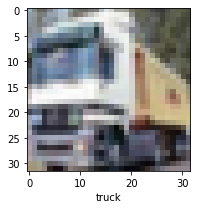

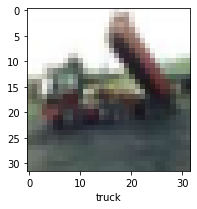

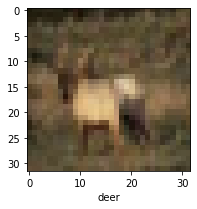

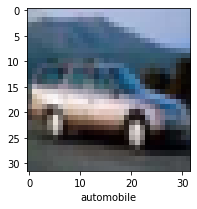

In [ ]:
for i in range(5):
    plot_figure(X_train,y_train,i)

# **Normalizing training and testing data with maximum value that a pixel can have.**

In [ ]:
X_train=X_train/255 #Normlizing training and testing data
X_test=X_test/255

# **Defining CNN model as learning model with 3 covolution and pooling layers followed by fully connected layers.**

In [ ]:
cnn=models.Sequential([
                       #CNN parameters
                       layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                       layers.MaxPooling2D(2,2),
                       #Next convolution and pooling layers
                       layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                       layers.MaxPooling2D(2,2),
                       #Next convolution and pooling layers
                       layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                       layers.MaxPooling2D(2,2),
                       #FC layers parameters
                       layers.Flatten(),
                       layers.Dense(100,activation='relu'),
                       layers.Dense(10,activation='softmax')                      
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
                                    

# **Training CNN model and Evaluating**

In [ ]:
cnn.fit(X_train,y_train,epochs=8)

Epoch 1/8
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5459 - accuracy: 0.4337
Epoch 2/8
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1528 - accuracy: 0.5919
Epoch 3/8
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9969 - accuracy: 0.6515
Epoch 4/8
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9030 - accuracy: 0.6837
Epoch 5/8
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8306 - accuracy: 0.7088
Epoch 6/8
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7747 - accuracy: 0.7293
Epoch 7/8
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7249 - accuracy: 0.7471
Epoch 8/8
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6819 - accuracy: 0.7622


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.8849 - accuracy: 0.6997


[0.8849244117736816, 0.6996999979019165]

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[3.7910365e-03, 5.6390633e-04, 1.7320108e-02, 8.6793590e-01,
        4.7020731e-03, 6.5686308e-02, 5.6091428e-04, 2.6125239e-02,
        1.2798594e-02, 5.1588810e-04],
       [1.8644562e-02, 5.6823343e-03, 6.5186723e-06, 1.2456473e-05,
        2.4677638e-06, 6.0421252e-07, 1.1961355e-06, 9.9612964e-07,
        9.7512323e-01, 5.2567589e-04],
       [1.1627314e-02, 7.6317950e-03, 1.3742027e-03, 9.2294579e-03,
        2.1722111e-04, 1.5058984e-03, 1.1598894e-03, 2.3527532e-04,
        9.6443796e-01, 2.5809535e-03],
       [9.1351002e-01, 6.2585640e-04, 3.5292342e-02, 2.6222391e-03,
        2.4071648e-03, 5.3087936e-04, 1.0758021e-04, 1.6791334e-04,
        4.3521211e-02, 1.2147026e-03],
       [1.6629093e-06, 1.3238841e-06, 1.7102461e-02, 5.6954273e-03,
        7.9550302e-01, 5.4303714e-04, 1.8113716e-01, 1.1614156e-05,
        4.1402823e-06, 1.5115029e-07]], dtype=float32)

# **Extracting the highest value from 10 output units for prediction**

In [ ]:
y_pred_classes=[np.argmax(element) for element in y_pred]
y_pred_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

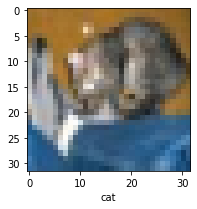

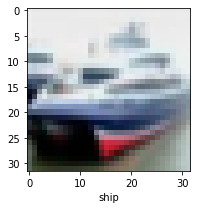

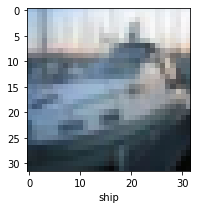

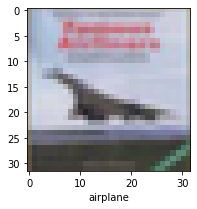

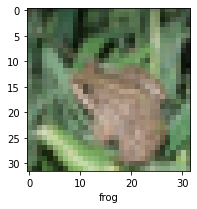

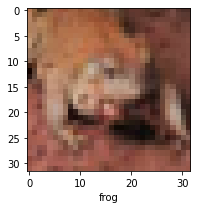

In [ ]:
for i in range(6):
    plot_figure(X_test,y_test,i)

# **Printing first 10 True Labels and Predicted Labels**

In [ ]:
print('True Label    Predicted Label')
for i in range(10):
    print(f'{labels[y_test[i]]}     {labels[y_pred_classes[i]]}')

True Label    Predicted Label
cat     cat
ship     ship
ship     ship
airplane     airplane
frog     deer
frog     frog
automobile     automobile
frog     frog
cat     cat
automobile     automobile


# **Printing Classification Report**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification report:\n",classification_report(y_test,y_pred_classes))

NameError: ignored